101000
111100
111100
111100
101000
111100
Processed 8649 lines.
0.001144


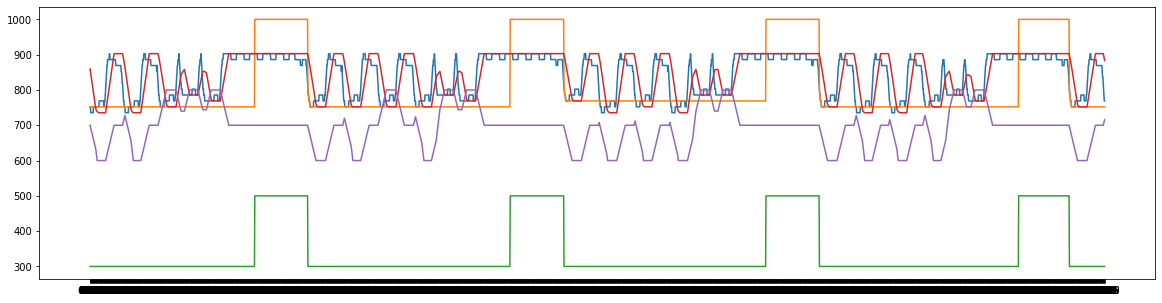

In [1]:
import csv
import matplotlib.pyplot as plt
import datetime
# Add the pi library for IO

dataVal={}
minSize=25
maxSize=55
window0=[-1]*minSize
window1=[-1]*maxSize
window2=[-1]*minSize
avg0=[]
avg1=[]
avg2=[]
avg3=[]
avg4=[]
output=[]
firstOne=5000
prevFirstOne=5000
startBit=5000
nullHigh=0
firstOneBool1=False
firstOneBool2=False
bitVal=-1
currentLevel=10000
packetTimeout=0
packetEnd=300
packetEndPrev=300
message=""
timeInterval=datetime.datetime.now()
intervalArray=[]

with open('11100.rtf') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader: #       Replace this with a while loop
#         Taha you can add time code here to measure
#         you can add the analog input here
            intervalArray.append(float((datetime.datetime.now()-timeInterval).total_seconds()))
            timeInterval=datetime.datetime.now()
            line_count += 1
            if line_count<=86:
                continue
#             print(row)
            #print(f'{row[0]}+{row[1][:-1]}')
            dataVal[row[0]]=row[1][:-1]
            time=int(row[0])
            val=int(row[1][:-1])
            
            
            
            
            
            window1=[val]+window1[0:-1]
            avg1.append(sum(window1)/maxSize)

            
            
            
            
            if (abs(avg1[-1]-nullHigh)>100):
                packetTimeout=0
            if firstOne==nullHigh:
                packetTimeout+=1
            if packetTimeout>100:
                packetEnd=500
            else:
                packetEnd=300
            if packetEndPrev!=packetEnd:
                #print("New Packet")
                firstOneBool1=False
                firstOneBool2=False
                startBit=1000
                count1=message.count("1")
                if count1%2==0 and len(message)==6:
                    print(message)
                message=""
                
            packetEndPrev=packetEnd
            avg3.append(packetEnd)
            
            
            
            
            
            avg0.append(nullHigh)
            if avg1[-1]>nullHigh:
                nullHigh=avg1[-1]     
                
            if (abs(avg1[-1]-nullHigh)>100):
                if avg1[-1]<firstOne:
                    firstOne=avg1[-1] ######## Picks out the value of first one. Need to reset after each packet
            else:
                firstOne=nullHigh   
            window2=[firstOne]+window2[0:-1]
            avg4.append(sum(window2)/minSize)
#             avg4.append(firstOne)
            
            
            
            
            
            if (abs(avg1[-1]-nullHigh)>100):
                firstOneBool1=True
                if not(firstOneBool2):
                    if avg1[-1]<startBit:
                        startBit=avg1[-1] ######## Picks out the value of first one. Need to reset after each packet
            else:
                if firstOneBool1:
                    firstOneBool2=True
                #firstOne=nullHigh
            avg2.append(startBit)
            
            
            
            
            if packetEnd==300:
                if firstOne>startBit and abs(nullHigh-firstOne)>100:
                    bitVal=800
                elif firstOne<=startBit and abs(nullHigh-firstOne)>100:
                    bitVal=600
                else:
                    bitVal=700

            window0=[bitVal]+window0[0:-1]
            output.append(sum(window0)/minSize)
#             output.append(bitVal)
            
            
            if prevFirstOne<firstOne:
                channelState=output[-1]
#                 channelState1=output[-1]
#                 channelState2=output[-25]
#                 channelState2=output[-50]
                activation=True
                if channelState>700:
                    message=message+"0"
                else:
                    message=message+"1"
            prevFirstOne=firstOne
#           End of loop, taha we dont need the things at the bottom. But they are good for analysis. Can deal with it later
           

    print(f'Processed {line_count} lines.')
    # print(dataVal)
#     print(intervalArray)
    print(max(intervalArray))
    plt.figure(figsize=(20, 5))
#     plt.plot(list(dataVal.keys())[2000:5000],avg0[2000:5000])
    plt.plot(list(dataVal.keys())[2000:5000],avg1[2000:5000])
    plt.plot(list(dataVal.keys())[2000:5000],avg2[2000:5000])
    plt.plot(list(dataVal.keys())[2000:5000],avg3[2000:5000])
    plt.plot(list(dataVal.keys())[2000:5000],avg4[2000:5000])
    plt.plot(list(dataVal.keys())[2000:5000],output[2000:5000])
    plt.show()